In [1]:
### Telecom Dataset

In [2]:
###!mkdir ~/.kaggle

In [3]:
###!cp /kaggle.json ~/.kaggle/

In [4]:
####!chmod 600 ~/.kaggle/kaggle.json

In [5]:
###! pip install kaggle

In [6]:
##!kaggle datasets download -d jazidesigns/telecom-dataset

In [7]:
### ! unzip /content/telecom-dataset.zip

In [8]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Importing all datasets
telco = pd.read_csv("/content/telco.csv")
telco.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [11]:
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
telco.shape

(7043, 21)

In [13]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_train, df_test = train_test_split(telco, test_size=0.3, random_state=100)
print(df_train.shape, df_test.shape)

(4930, 21) (2113, 21)


In [17]:
df_train.to_csv("train.csv")
df_test.to_csv("test.csv")

In [18]:
telco["gender"] = telco["gender"].astype("category").cat.codes
telco["Partner"] = telco["Partner"].astype("category").cat.codes
telco["Dependents"] = telco["Dependents"].astype("category").cat.codes
telco["PhoneService"] = telco["PhoneService"].astype("category").cat.codes
telco["MultipleLines"] = telco["MultipleLines"].astype("category").cat.codes

In [19]:
telco["InternetService"] = telco["InternetService"].astype("category").cat.codes
telco["OnlineSecurity"] = telco["OnlineSecurity"].astype("category").cat.codes
telco["OnlineBackup"] = telco["OnlineBackup"].astype("category").cat.codes
telco["DeviceProtection"] = telco["DeviceProtection"].astype("category").cat.codes
telco["TechSupport"] = telco["TechSupport"].astype("category").cat.codes

In [20]:
telco["StreamingTV"] = telco["StreamingTV"].astype("category").cat.codes
telco["StreamingMovies"] = telco["StreamingMovies"].astype("category").cat.codes
telco["Contract"] = telco["Contract"].astype("category").cat.codes
telco["PaperlessBilling"] = telco["PaperlessBilling"].astype("category").cat.codes
telco["PaymentMethod"] = telco["PaymentMethod"].astype("category").cat.codes
telco["TotalCharges"] = telco["TotalCharges"].astype("category").cat.codes
telco["Churn"] = telco["Churn"].astype("category").cat.codes

In [21]:
telco["customerID"] = telco["customerID"].astype("category").cat.codes

In [22]:
telco.shape

(7043, 21)

In [23]:
X = telco.drop(['TotalCharges'], axis=1)

In [24]:
Y = telco["TotalCharges"]

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[0.02299762 0.01136095 0.0052955  0.01095782 0.00937496 0.55780546
 0.01543808 0.01679043 0.05996042 0.00847431 0.01226424 0.0114593
 0.00693779 0.01342141 0.02294389 0.02622031 0.00828448 0.01478611
 0.1551276  0.01009932]


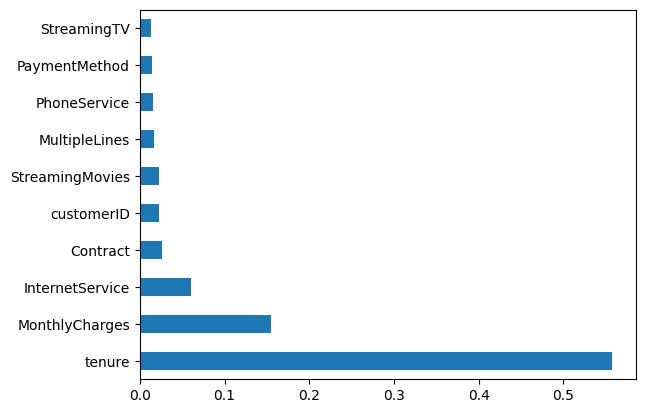

In [27]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [28]:
X.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,-0.003334,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,-0.289309


In [29]:
threshold=0.8

In [30]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [31]:
correlation(X.iloc[:,:-1],threshold)

set()

In [32]:
from sklearn.feature_selection import mutual_info_regression

In [33]:
mutual_info=mutual_info_regression(X,Y)

In [34]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)


tenure              0.649064
MonthlyCharges      0.525242
StreamingTV         0.135138
StreamingMovies     0.130743
OnlineBackup        0.128836
DeviceProtection    0.128075
InternetService     0.125143
TechSupport         0.111930
OnlineSecurity      0.107180
MultipleLines       0.099101
Contract            0.092241
PaymentMethod       0.052508
Partner             0.042013
Churn               0.034474
PhoneService        0.026892
PaperlessBilling    0.018870
Dependents          0.010622
gender              0.008417
customerID          0.002807
SeniorCitizen       0.001948
dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# columnslitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4930, 20)
(2113, 20)
(4930,)
(2113,)


In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [39]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=5)),
                     ('lin_regressor',LinearRegression())])

In [40]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=5)),
                     ('dt_regressor',DecisionTreeRegressor())])

In [41]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=5)),
                     ('rf_classifier',RandomForestRegressor())])

In [42]:
pipeline_xgbregressor=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=5)),
                     ('rf_classifier',XGBRegressor())])

In [43]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_xgbregressor]

In [44]:
best_accuracy=0.0
best_regressor=0
best_pipeline=""

In [45]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: 'XGBRegressor'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, Y_train)

In [46]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,Y_test)))

Logistic Regression Test Accuracy: 0.06810703677121277
Decision Tree Test Accuracy: -0.37423858790318354
RandomForest Test Accuracy: 0.2778241247569774
XGBRegressor Test Accuracy: 0.23433157352092027


In [47]:
xgb_regressor=XGBRegressor(random_state=0).fit(X_train,Y_train)
prediction_xgb=xgb_regressor.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
print("Mean Squarred Error : ",mean_squared_error(Y_test,prediction_xgb))
print("Mean Absolute Error : ",mean_absolute_error(Y_test,prediction_xgb))
print("Mean Absolute Percentage Error : ",mean_absolute_percentage_error(Y_test,prediction_xgb))

Mean Squarred Error :  812089.75
Mean Absolute Error :  405.6939
Mean Absolute Percentage Error :  656960669285814.6


In [49]:
print("R2 Score : ",r2_score(Y_test,prediction_xgb))

R2 Score :  0.7772077083523357


In [50]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time

In [51]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
    'min_child_weight':[4,5],
    'gamma':[i/10.0 for i in range(3,6)],
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)],
    'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

reg = XGBRegressor(nthread=-1)

# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(reg, param_distributions=params,
                                   n_iter=n_iter_search, cv=9, scoring='neg_mean_squared_error')

start = time.time()
random_search.fit(X_train, Y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))

[15:29:09] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[15:29:09] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[15:29:09] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[15:29:10] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[15:29:12] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[15:29:12] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[15:29:13] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_c

In [52]:
best_regressor = random_search.best_estimator_

In [53]:
print(best_regressor)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric='rmse',
             feature_types=None, gamma=0.4, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=None,
             nthread=-1, num_parallel_tree=None, ...)


In [54]:
y_pred_rmse=best_regressor.predict(X_test)

In [55]:
print("Mean Squarred Error : ",mean_squared_error(Y_test,y_pred_rmse))
print("Mean Absolute Error : ",mean_absolute_error(Y_test,y_pred_rmse))
print("Mean Absolute Percentage Error : ",mean_absolute_percentage_error(Y_test,y_pred_rmse))

Mean Squarred Error :  870317.06
Mean Absolute Error :  447.44952
Mean Absolute Percentage Error :  4842875717007496.0


In [56]:
print("R2 Score : ",r2_score(Y_test,y_pred_rmse))

R2 Score :  0.7612333615378575


In [57]:
y_pred_rmse = pd.DataFrame(y_pred_rmse)

In [58]:
y_pred_rmse.rename(columns = {0:"Predict"}, inplace=True)

In [59]:
print(y_pred_rmse.columns)
print(X_test.columns)

Index(['Predict'], dtype='object')
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')


In [60]:
newdf = X_test.join(y_pred_rmse)

In [61]:
newdf.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn', 'Predict'],
      dtype='object')

In [62]:
newdf.to_csv("predict.csv")